In [1]:
import glob
import os
import re

import matplotlib.pyplot as plt
import numpy as np
import scienceplots
import scipy.stats as stats

plt.style.use("science")

In [2]:
DATA = []
folder = "data/single-layer"
for trialid in sorted(os.listdir(folder)):
    files = sorted(glob.glob("%s/%s/*.txt" % (folder, trialid)), reverse=True)
    activation = []
    for file in files:
        data = open(file).read()
        data = re.findall(r"ACC: (.*) (.*)", data)
        data = np.array(data).astype(float)
        # data = np.log10(data)
        activation.append(data)
    DATA.append(activation)
DATA = np.array(DATA)
DATA.shape

(7, 6, 10, 2)

In [3]:
log = lambda x: np.log(x) / np.log(50)
mean = log(DATA).mean(axis=0)
var = log(DATA).var(axis=0)

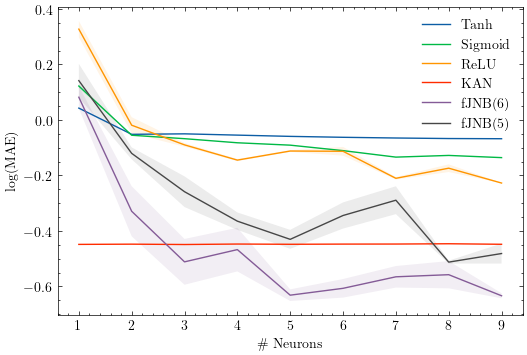

In [4]:
neurons = list(range(1, 11))
mapping = {
    "JNB5": "fJNB(5)",
    "JNB6": "fJNB(6)",
    "RELU": "ReLU",
    "SIGMOID": "Sigmoid",
    "TANH": "Tanh",
    "KAN": "KAN",
}
names = list(map(lambda t: mapping[re.findall(r".*/.*/(.*)\.txt", t)[0]], files))

M = 0
N = 9
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
for i, act in enumerate(names):
    ax.plot(neurons[M:N], mean[i, M:N, 1], label=act)
    ax.fill_between(
        neurons[M:N],
        mean[i, M:N, 1] - var[i, M:N, 1],
        mean[i, M:N, 1] + var[i, M:N, 1],
        alpha=0.1,
    )
ax.set_xlabel("\# Neurons")
ax.set_ylabel(r"$\log(\text{MAE})$")
ax.legend()
fig.savefig("compare-activations.pdf", bbox_inches="tight")

In [5]:
DATA = []
folder = "data/multi-layer"
for trialid in sorted(os.listdir(folder)):
    # print(trialid)
    files = sorted(glob.glob("%s/%s/*.txt" % (folder, trialid)), reverse=True)
    activation = []
    for file in files:
        data = open(file).read()
        data = re.findall(r"ACC: (.*) (.*)", data)
        data = np.array(data).astype(float)
        # data = np.log10(data)
        activation.append(data)
    # print(len(activation))
    DATA.append(activation)
DATA = np.array(DATA)
DATA.shape

(7, 6, 5, 2)

In [6]:
mean = log(DATA).mean(axis=0)
var = log(DATA).var(axis=0)

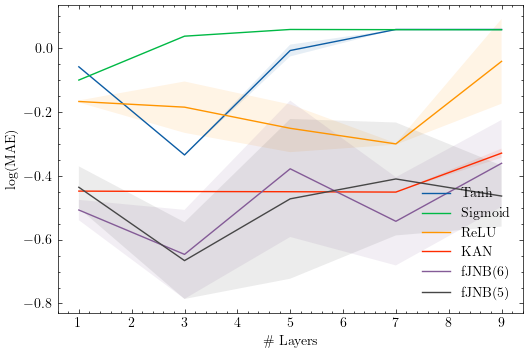

In [7]:
neurons = list(range(1, 11, 2))
mapping = {
    "JNB5": "fJNB(5)",
    "JNB6": "fJNB(6)",
    "RELU": "ReLU",
    "SIGMOID": "Sigmoid",
    "TANH": "Tanh",
    "KAN": "KAN",
}
names = list(
    map(lambda t: mapping[re.findall(r".*/.*/(.*)\.txt", t)[0]], files)
)

M = 0
N = 9
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
for i, act in enumerate(names):
    ax.plot(neurons[M:N], mean[i, M:N, 1], label=act)
    ax.fill_between(
        neurons[M:N],
        mean[i, M:N, 1] - var[i, M:N, 1],
        mean[i, M:N, 1] + var[i, M:N, 1],
        alpha=0.1,
    )
ax.set_xlabel("\# Layers")
ax.set_ylabel(r"$\log(\text{MAE})$")
ax.legend()
fig.savefig("compare-layers.pdf", bbox_inches="tight")

In [8]:
import glob
import re

import numpy as np
import pandas as pd

DATA = []
folder = "data/multi-layer-all"

files = sorted(
    glob.glob("%s/**/*.txt" % (folder), recursive=True), reverse=True
)
activation = []
for file in files:
    data = open(file).read()
    data = re.findall(r"ACC: (.*) (.*)", data)
    data = np.array(data).astype(float)
    
    activation.append(data)

DATA.append(activation)
DATA = np.array(DATA)
DATA = DATA.mean(axis=0)
DATA.shape

(12, 5, 2)

In [9]:
mapping = {
    "JNB5": "JNB(5)",
    "JNB6": "JNB(6)",
    "RELU": "ReLU",
    "SIGMOID": "Sigmoid",
    "TANH": "Tanh",
}
names = list(
    map(
        lambda t: mapping.get(
            re.findall(r".*/.*/(.*)\.txt", t)[0],
            re.findall(r".*/.*/(.*)\.txt", t)[0].upper(),
        ),
        files,
    )
)

In [10]:
pd.DataFrame(DATA[:, :, 1], index=names)

,0,1,2,3,4
SOFTPLUS,0.4390,0.4630,0.4850,0.468,1.7600
SILU,0.6740,0.5190,0.5100,0.337,1.0400
SELU,0.7410,0.9240,0.2290,0.171,0.1270
LEAKY_RELU,0.3490,0.2860,0.7060,0.152,0.3540
GELU,0.7130,0.6250,0.7190,0.283,0.1240
ELU,0.6630,0.7520,0.4330,0.786,0.6100
Tanh,0.7940,0.2640,1.2600,1.260,1.2600
Sigmoid,0.7930,1.2400,1.2600,1.260,1.2400
ReLU,0.4290,0.7300,0.3430,0.353,4.7200
KAN,0.1730,0.1730,0.1720,0.166,0.2470
